# Zeros of the series expansion of the spherical Hankel function

This Jupyter notebook calculates the zeros of the power series expansion of the spherical Hankel function with arbitrary numerical resolution.

\begin{equation}
h_n^{(2)}(s) = -j^n e^{-s} \frac{\sum_{k=0}^{n} \beta_n(k) s^k}{s^{n+1}}
\end{equation}

with

\begin{equation}
\beta_n(k) = \frac{(2n-k)!}{(n-k)! k! 2^{n-k}}
\end{equation}

In [1]:
%matplotlib inline

import mpmath as mp
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.markers import MarkerStyle
from matplotlib.patches import Circle
import scipy.signal as sig

mp.dps = 500

### Function to plot pole/zero locations in the $z$-plane

In [2]:
def zplane(z, p):
    
    ax = plt.gca()
    plt.hold(True)

    unit_circle = Circle((0,0), radius=1, fill=False,
                         color='black', ls='solid', alpha=0.9)
    ax.add_patch(unit_circle)
    ax.axvline(0, color='0.7')
    ax.axhline(0, color='0.7')
    plt.axis('equal')
    plt.xlim((-2, 2))
    plt.ylim((-2, 2))
    plt.grid()
    plt.xlabel(r'Re{$z$}')
    plt.ylabel(r'Im{$z$}')

    ax.plot(np.real(z), np.imag(z), 'bo', fillstyle='none', ms = 10)
    ax.plot(np.real(p), np.imag(p), 'rx', fillstyle='none', ms = 10)

    plt.hold(False)

### Coefficients of power series expansion of spherical Hankel function

In [3]:
order = 150  # order of spherical Hankel function

B = [mp.fac(2*order-n)/(mp.fac(order-n)*mp.fac(n)*2**(order-n)) for n in reversed(range(order))]

### Zeros of series expansion

In [4]:
z = mp.polyroots(B, extraprec=500, maxsteps=500)

### Matched $z$-transform

In [5]:
T = mp.mpc(1/44100)
Z = [mp.exp(zi*T) for zi in z]

### Pole/Zero locations

AttributeError: module 'matplotlib.pyplot' has no attribute 'hold'

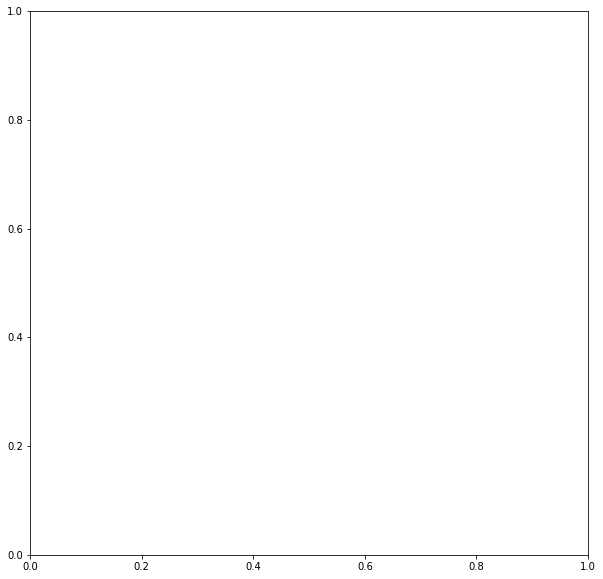

In [6]:
Z = [complex(Zi) for Zi in Z]
P = np.zeros(order-1, dtype=complex)

plt.figure(figsize=(10,10))
zplane(Z, P)
plt.axis([0.990, 1.010, -0.010, 0.010])
plt.savefig('hn_zeros_N=%d.png'%order)